## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Group dataframe by mouse id
id_group = merge_df.groupby("Mouse ID")

# Count the number of unique timepoints for each mouse id
id_timepoint_df = pd.DataFrame(id_group["Timepoint"].value_counts())

# Rename the "Timepoint" column to "TimePoint value count"
id_timepoint_df = id_timepoint_df.rename(columns={"Timepoint": "Timepoint value count"})

id_timepoint_df

Timepoint value count
Mouse ID Timepoint                       
a203     0                              1
         5                              1
         10                             1
         15                             1
         20                             1
...                                   ...
z969     25                             1
         30                             1
         35                             1
         40                             1
         45                             1

[1888 rows x 1 columns]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Find duplicate timepoints (in .loc can't pass in an index for column name) 
# Look and return any row in the column "Timepoint value count" that is > 1
duplicate_df = id_timepoint_df.loc[id_timepoint_df["Timepoint value count"] > 1, :] 

# Get all data for the duplicate mouse id
duplicate_mouse_df = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"] !="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_group = clean_df.groupby("Drug Regimen")

tumor_mean = regimen_group["Tumor Volume (mm3)"].mean()
tumor_median = regimen_group["Tumor Volume (mm3)"].median()
tumor_var = regimen_group["Tumor Volume (mm3)"].var()
tumor_std = regimen_group["Tumor Volume (mm3)"].std()
tumor_sem = regimen_group["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
                           "Mean Tumor Volume (mm3)": tumor_mean,
                           "Median Tumor Volume (mm3)": tumor_median,
                           "Var Tumor Volume (mm3)": tumor_var,
                           "Std Tumor Volume (mm3)": tumor_std,
                           "Sem Tumor Volume (mm3)": tumor_sem})

summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Var Tumor Volume (mm3),Std Tumor Volume (mm3),Sem Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

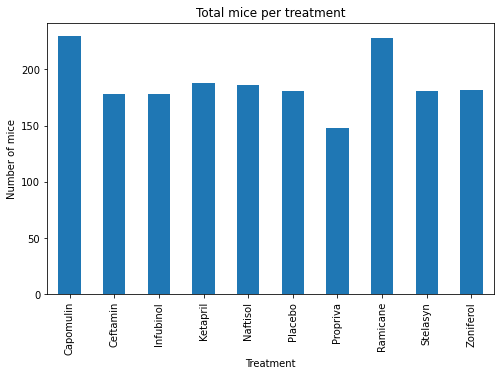

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Pandas - DataFrame/Series.plot()
# for df use: df.groupby("Drug Regimen")[["Mouse ID"]].count()
# for series use: df.groupby("Drug Regimen")["Mouse ID"].count()
# Df has index already set to drug, don't need to set the index for the labels
treatment_series = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
treatment_series.plot(kind='bar', figsize=(8,5))
plt.xlabel("Treatment")
plt.ylabel("Number of mice")
plt.title("Total mice per treatment")
plt.show()
plt.tight_layout()

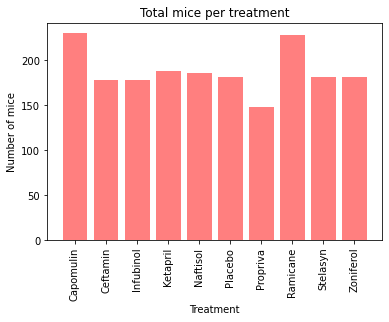

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment_group_df = clean_df.groupby("Drug Regimen")[["Mouse ID"]].count()
treatment_group_df = treatment_group_df.rename(columns={"Mouse ID": "Mouse ID count"})
treatment_group_df = treatment_group_df.reset_index()

x_axis = np.arange(len(treatment_group_df))
plt.bar(x_axis, treatment_group_df["Mouse ID count"], color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, treatment_group_df["Drug Regimen"], rotation="vertical")
plt.xlabel("Treatment")
plt.ylabel("Number of mice")
plt.title("Total mice per treatment")
plt.show()
plt.tight_layout()

(-1.1171944866462706,
 1.1057967798535038,
 -1.110919364943666,
 1.107907705791865)

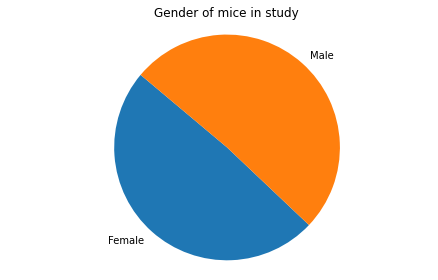

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group_df = clean_df.groupby("Sex")[["Mouse ID"]].count()
gender_group_df = gender_group_df.rename(columns={"Mouse ID": "Mouse ID count"})
gender_group_df["Percent"] = gender_group_df["Mouse ID count"] / gender_group_df["Mouse ID count"].sum()

gender_list = gender_group_df["Percent"]
gender_pie = gender_group_df["Percent"].plot(kind="pie", y=gender_list, title=("Gender of mice in study"), startangle=140)
gender_pie.set_ylabel(" ")
plt.tight_layout()
plt.axis("equal")

(-1.1171944866462706,
 1.1057967798535038,
 -1.110919364943666,
 1.107907705791865)

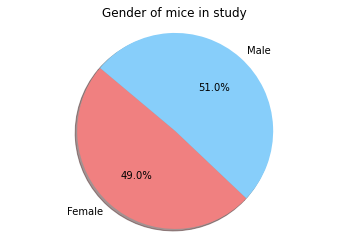

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_group_df.index
total_mice = gender_group_df["Percent"]
colors = ["lightcoral", "lightskyblue"]
plt.pie(total_mice, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Gender of mice in study")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# for each mouse id get max(timepoint)
# NOTE: as_index = False - making mouse id (which I am grouping by) NOT the index (groupby would normally make what you groupby the index)
mouseid_group_df = clean_df.groupby('Mouse ID').agg({"Timepoint": "max"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_tumorvol_df = pd.merge(mouseid_group_df, clean_df, how='inner', on = ['Mouse ID', 'Timepoint'])
merge_tumorvol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# For each treatment in treatments list
for treatment in treatments:
    
    # df.loc by "Drug Regimen" and where drug regimen in df matches treatment in list, 
    # get the "Tumor Volume (mm3)"
    vol = merge_tumorvol_df.loc[merge_tumorvol_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # append tumor volume to list
    tumor_vol.append(vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = vol.quantile([.25,.5,.75]) 
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{treatment}")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")  
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Determine outliers using upper and lower bounds
    outliers = vol.loc[(vol < lower_bound) | (vol > upper_bound)]
    print(f"Outliers: {outliers}")
    print("----------------------------------------------------")

Capomulin
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------------------
Ramicane
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------------------
Infubinol
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
-----------------------------------

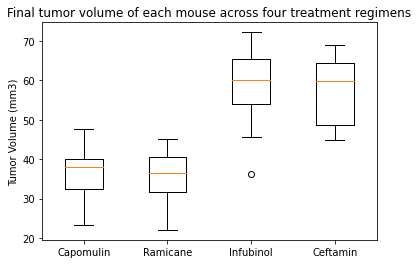

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Note: Sample sizes needs to be same for each treatment to be able to make scientific comparisons between treatments with boxplot
fig1, ax1 = plt.subplots()
labels = treatments
ax1.boxplot(tumor_vol, labels=labels)
ax1.set_title('Final tumor volume of each mouse across four treatment regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == 'Capomulin', :]
mouse = input("Please enter the id of a mouse treated with Capomulin? ")

Please enter the id of a mouse treated with Capomulin? s185


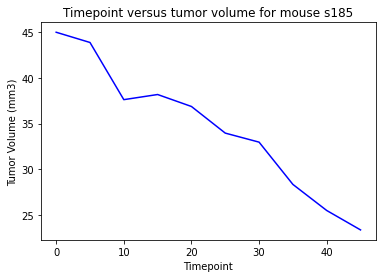

In [17]:
mouse_result = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse,["Timepoint", "Tumor Volume (mm3)"]]

# Set the x axis
timepoints = mouse_result["Timepoint"]

# Plot line graph
plt.plot(timepoints, mouse_result["Tumor Volume (mm3)"], color="blue")
plt.title("Timepoint versus tumor volume for mouse " + mouse)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

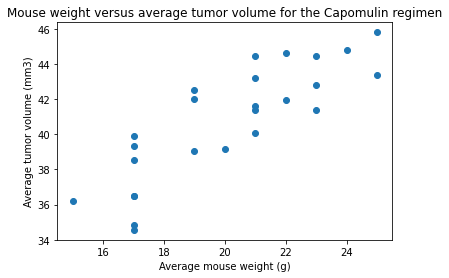

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mean_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mean_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mean_weight, mean_tumor_volume)
plt.xlabel('Average mouse weight (g)')
plt.ylabel('Average tumor volume (mm3)')
plt.annotate
plt.title('Mouse weight versus average tumor volume for the Capomulin regimen')
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mean_weight,mean_tumor_volume)
print(f"The corrrelation coefficient of mouse weight and tumor volume is {correlation[0]}")

The corrrelation coefficient of mouse weight and tumor volume is 0.8419363424694717


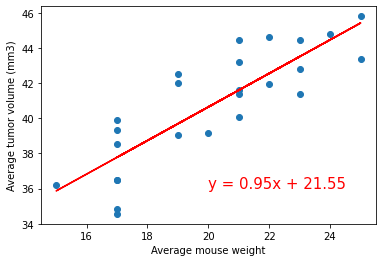

<Figure size 432x288 with 0 Axes>

In [20]:
# linear regression model
x_values = mean_weight
y_values = mean_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Average mouse weight')
plt.ylabel('Average tumor volume (mm3)')
plt.show()
plt.tight_layout()